# 4.1.2 Time Analysis

After observing, how much people are using the service, we wanted to detemine for how long people are using the service.

In [1]:
import pandas as pd
import vaex
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

## 4.1.2.1 Daily average trip durations in seconds over whole year

In [2]:
# Analyizing trip duration patterns on a yearly and hourly basis, starting with yearly
df_trips = vaex.open('./data/trips_prepared.hdf5')

In [3]:
df_trips.head()

#,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,trip_start_hour,trip_end_hour
0,f00546971a3e4c8ab55761a337443a0dfa33f42f,'631de3a4ad35b7d7d75949b33ad59e09820b51b3f58225d...,2017-01-01 00:00:00.000000,2017-01-01 00:30:00.000000,1800,0,1.70311e+10,1.70311e+10,8,8,13.25,4.25,0,1,18.5,Credit Card,Taxi Affiliation Services,41.8932,-87.6378,POINT (-87.6378442095 41.8932163595),41.8925,-87.6262,POINT (-87.6262149064 41.8925077809),0,0
1,fe9bfc25af9dffac30370f4e7d57a8c8a8bdbc0d,'b7da4d1247a408c100b4964f236760694290aace75c8b87...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,660,2.7,1.7031e+10,1.70318e+10,2,3,10,2,0,0,12,Credit Card,Choice Taxi Association,42.0016,-87.695,POINT (-87.6950125892 42.001571027),41.9658,-87.6559,POINT (-87.6558787862 41.96581197),0,0
2,149f18c2d8b9bce6001cc9e156092aa562c83bc1,'b7a562fe2d37014bb47274cb5baa361b97ff9263e3ba526...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,120,0.5,1.70312e+10,1.70312e+10,16,16,4.5,0,0,0,4.5,Cash,Taxi Affiliation Services,41.9536,-87.7235,POINT (-87.7234523905 41.9535821253),41.9536,-87.7235,POINT (-87.7234523905 41.9535821253),0,0
3,1b545d0be27b195076e5d2a7d4fc0ebef6ef20ac,'56a1119c6ca57e39525cf06829f9ecff553cf4b5ac24821...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,240,1.3,1.70318e+10,1.70318e+10,32,28,6.25,0,0,0,6.25,Cash,Taxi Affiliation Services,41.881,-87.6327,POINT (-87.6327464887 41.8809944707),41.8853,-87.6572,POINT (-87.6572331997 41.8852813201),0,0
4,f398f04efdae9641df780e0a824770a62ab9a2ea,'9149bad3504bb6966a90f2d42d8a98fdd4d8c27bb2e408c...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,420,0,1.70313e+10,1.70318e+10,28,32,6,0,0,0,6,Cash,Blue Ribbon Taxi Association Inc.,41.8793,-87.6426,POINT (-87.642648998 41.8792550844),41.881,-87.6327,POINT (-87.6327464887 41.8809944707),0,0
5,7f6cfe5d83d1625724b534dc1130aca455f3c46f,'15ae156101456925cc4ade445676def1ae013e526cff1ab...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,360,0,1.70311e+10,1.70311e+10,8,8,5.5,0,0,1,6.5,Cash,Taxi Affiliation Services,41.9002,-87.6291,POINT (-87.6291051864 41.9002212967),41.892,-87.6319,POINT (-87.6318639497 41.8920421365),0,0
6,d056e52f21b582d105b458a30463a1e684b9a54e,'3357e3170510a0374bc28e6baebeaa47cb6a971606874e1...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,1080,0,1.70318e+10,1.70313e+10,32,32,9.75,0,0,1,10.75,Cash,Taxi Affiliation Services,41.881,-87.6327,POINT (-87.6327464887 41.8809944707),41.885,-87.621,POINT (-87.6209929134 41.8849871918),0,0
7,c3ee40051c5643c54064a8b9df3686d2d411518d,'7987cfe5e3b2c9869665f70fe35dbe7423e7fc5852f2d6f...,2017-01-01 00:00:00.000000,2017-01-01 00:15:00.000000,1500,0.4,1.70318e+10,1.70311e+10,32,8,22.75,4.85,0,1.5,29.1,Credit Card,Blue Ribbon Taxi Association Inc.,41.881,-87.6327,POINT (-87.6327464887 41.8809944707),41.8983,-87.6208,POINT (-87.6207628651 41.8983317935),0,0
8,29f30c8a6bbc028f5d63aa18c708d31b47267a9f,'0b269137bd94b55212311226d9e1554423e12bcc16a432c...,2017-01-01 00:00:00.000000,2017-01-01 00:30:00.000000,1620,0.9,1.70318e+10,1.70311e+10,32,8,12.25,2.85,0,2,17.1,Credit Card,Taxi Affiliation Services,41.881,-87.6327,POINT (-87.6327464887 41.8809944707),41.8925,-87.6262,POINT (-87.6262149064 41.8925077809),0,0
9,bfa259279b4557566d2d06381156715d9be355a1,'7e7dce4bc47f1de9dd9e4fe427408dbf9fc61d786574a5a...,2017-01-01 00:00:00.000000,2017-01-01 00:00:00.000000,480,3.5,1.7031e+10,1.70311e+10,77,6,11.25,0,0,1,12.25,Cash,Choice Taxi Association,41.9867,-87.6634,POINT (-87.6634164054 41.9867117999),41.9442,-87.656,POINT (-87.6559981815 41.9442266014),0,0


In [4]:
df_trips['trip_start_timestamp'] = df_trips['trip_start_timestamp'].astype('datetime64')
df_trips['trip_start_date'] = df_trips['trip_start_timestamp'].dt.date

In [5]:
weather_df = vaex.from_csv('./data/weather_data_final.csv')

In [6]:
weather_df['date_time'] = weather_df['date_time'].astype('datetime64')

In [7]:
weather_df.head()

#,date,time,temp,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition,date_time
0,2017-01-01,00:53,33 °F,24 °F,70 °%,8 °mph,0 °mph,29.45 °in,0.0 °in,Partly Cloudy,2017-01-01 00:53:00
1,2017-01-01,01:53,25 °F,18 °F,75 °%,3 °mph,0 °mph,29.33 °in,0.0 °in,Fair,2017-01-01 01:53:00
2,2017-01-01,02:53,25 °F,18 °F,75 °%,0 °mph,0 °mph,29.34 °in,0.0 °in,Fair,2017-01-01 02:53:00
3,2017-01-01,03:53,25 °F,19 °F,78 °%,5 °mph,0 °mph,29.36 °in,0.0 °in,Fair,2017-01-01 03:53:00
4,2017-01-01,04:53,24 °F,18 °F,77 °%,7 °mph,0 °mph,29.37 °in,0.0 °in,Fair,2017-01-01 04:53:00
5,2017-01-01,05:53,22 °F,17 °F,82 °%,6 °mph,0 °mph,29.39 °in,0.0 °in,Fair,2017-01-01 05:53:00
6,2017-01-01,06:53,22 °F,17 °F,82 °%,7 °mph,0 °mph,29.41 °in,0.0 °in,Cloudy,2017-01-01 06:53:00
7,2017-01-01,07:53,22 °F,17 °F,82 °%,8 °mph,0 °mph,29.43 °in,0.0 °in,Cloudy,2017-01-01 07:53:00
8,2017-01-01,08:53,22 °F,17 °F,82 °%,5 °mph,0 °mph,29.44 °in,0.0 °in,Cloudy,2017-01-01 08:53:00
9,2017-01-01,09:53,26 °F,20 °F,78 °%,3 °mph,0 °mph,29.45 °in,0.0 °in,Fair,2017-01-01 09:53:00


In [8]:
# Calculating mean trip duration for every day of the year
avg_duration_year = df_trips.groupby(by='trip_start_date').agg({'mean_trip_seconds': vaex.agg.mean('trip_seconds')}) 

In [9]:
# sort by date
avg_duration_year = avg_duration_year.sort('trip_start_date')
avg_duration_year = avg_duration_year.to_pandas_df()
avg_duration_year.head()

,trip_start_date,mean_trip_seconds
0,2017-01-01,685.512403
1,2017-01-02,748.521707
2,2017-01-03,705.300305
3,2017-01-04,691.319290
4,2017-01-05,745.031689


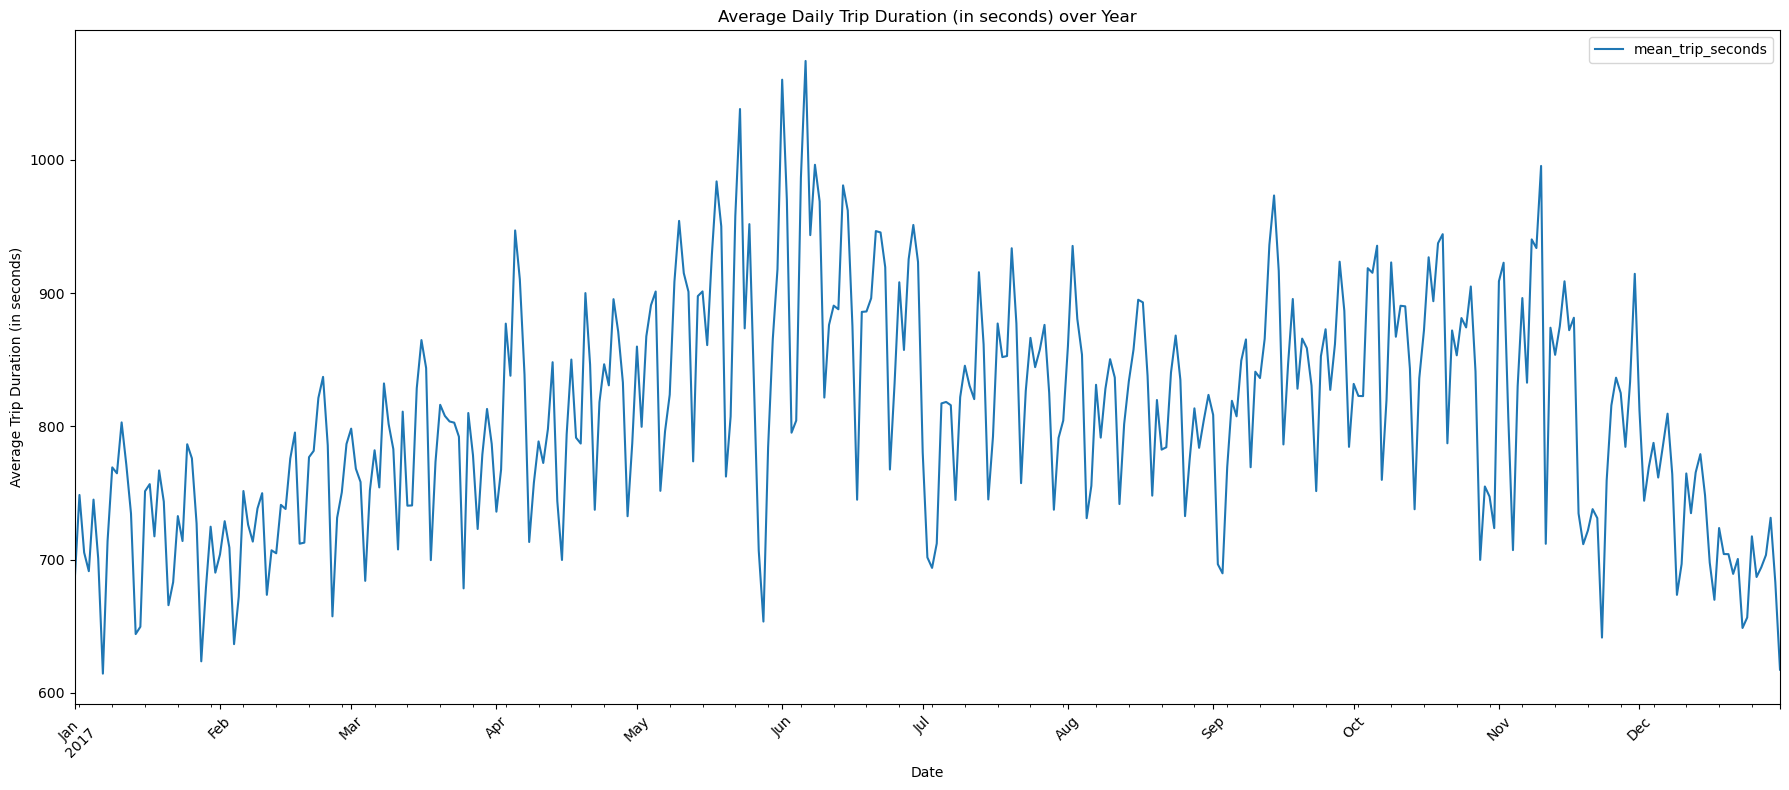

In [10]:
# plot average trip duration for whole year
avg_duration_year.plot(x='trip_start_date', y='mean_trip_seconds', kind='line', figsize=(18,8)) 
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (in seconds)')
plt.title('Average Daily Trip Duration (in seconds) over Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.1.2.2 Impact of Environmental Metrics

In [11]:
# Preparing every possible enviornmental feature
# removing any types of units from the features, allowing for easier calculations

weather_prep = weather_df.copy()
weather_prep = weather_prep.to_pandas_df()
# rename column to make merge with duration data easier
weather_prep['trip_start_date'] = pd.to_datetime(weather_prep['date_time'].dt.date)
weather_prep = weather_prep.drop('date', axis = 1)
weather_prep['date'] = pd.to_datetime(weather_prep['date_time'])
weather_prep['temp'] = weather_prep.loc[:, 'temp'].astype(str)
weather_prep.loc[:,'temp'] = weather_prep['temp'].astype(str).str.strip(' °F').astype(float)
weather_prep.loc[:,'dew_point'] = weather_prep['dew_point'].astype(str).str.strip(' °F').astype(float)
weather_prep.loc[:,'humidity'] = weather_prep['humidity'].astype(str).str.strip(' °%').astype(float)
weather_prep.loc[:,'wind_speed'] = weather_prep['wind_speed'].astype(str).str.strip(' °mph').astype(float)
weather_prep.loc[:,'wind_gust'] = weather_prep['wind_gust'].astype(str).str.strip(' °mph').astype(float)
weather_prep.loc[:,'pressure'] = weather_prep['pressure'].astype(str).str.strip(' °in').astype(float)
weather_prep.loc[:,'precip'] = weather_prep['precip'].astype(str).str.strip(' °in').astype(float)
conditions_map = {"Fair": 0, "Mostly Cloudy": 1,"Partly Cloudy": 2, "Cloudy": 3,"Light Rain": 4,"Thunder": 5}
weather_prep['condition_map'] = weather_prep['condition'].map(conditions_map)
weather_prep['condition_map'] = weather_prep['condition_map'].astype(float)

In [12]:
# merge together weather dataframe and average trip duration dataframe
duration_weather_year = pd.merge(avg_duration_year, weather_prep, on='trip_start_date', how='outer')
duration_weather_year = duration_weather_year.drop(['date_time','date','condition'], axis = 1)

In [13]:
# Group every environmental feature based on date
list_features = ['mean_trip_seconds','temp','dew_point','humidity','wind_speed','wind_gust','pressure','precip','condition_map']
duration_weather_year = duration_weather_year.groupby(['trip_start_date'])[list_features].mean().reset_index()
duration_weather_year['condition_map'] = duration_weather_year['condition_map'].apply(lambda x: round(x,0))

In [14]:
duration_weather_year.head()

,trip_start_date,mean_trip_seconds,temp,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition_map
0,2017-01-01,685.512403,31.291667,19.666667,63.958333,5.625000,0.000000,29.437083,0.0,1.0
1,2017-01-02,748.521707,37.541667,32.375000,81.916667,6.833333,0.000000,29.353333,0.0,2.0
2,2017-01-03,705.300305,37.458333,33.166667,84.791667,9.750000,6.166667,29.147917,0.0,3.0
3,2017-01-04,691.319290,14.750000,1.625000,56.750000,15.666667,15.125000,29.352500,0.0,1.0
4,2017-01-05,745.031689,9.791667,-3.125000,56.166667,12.083333,4.583333,29.388333,0.0,1.0


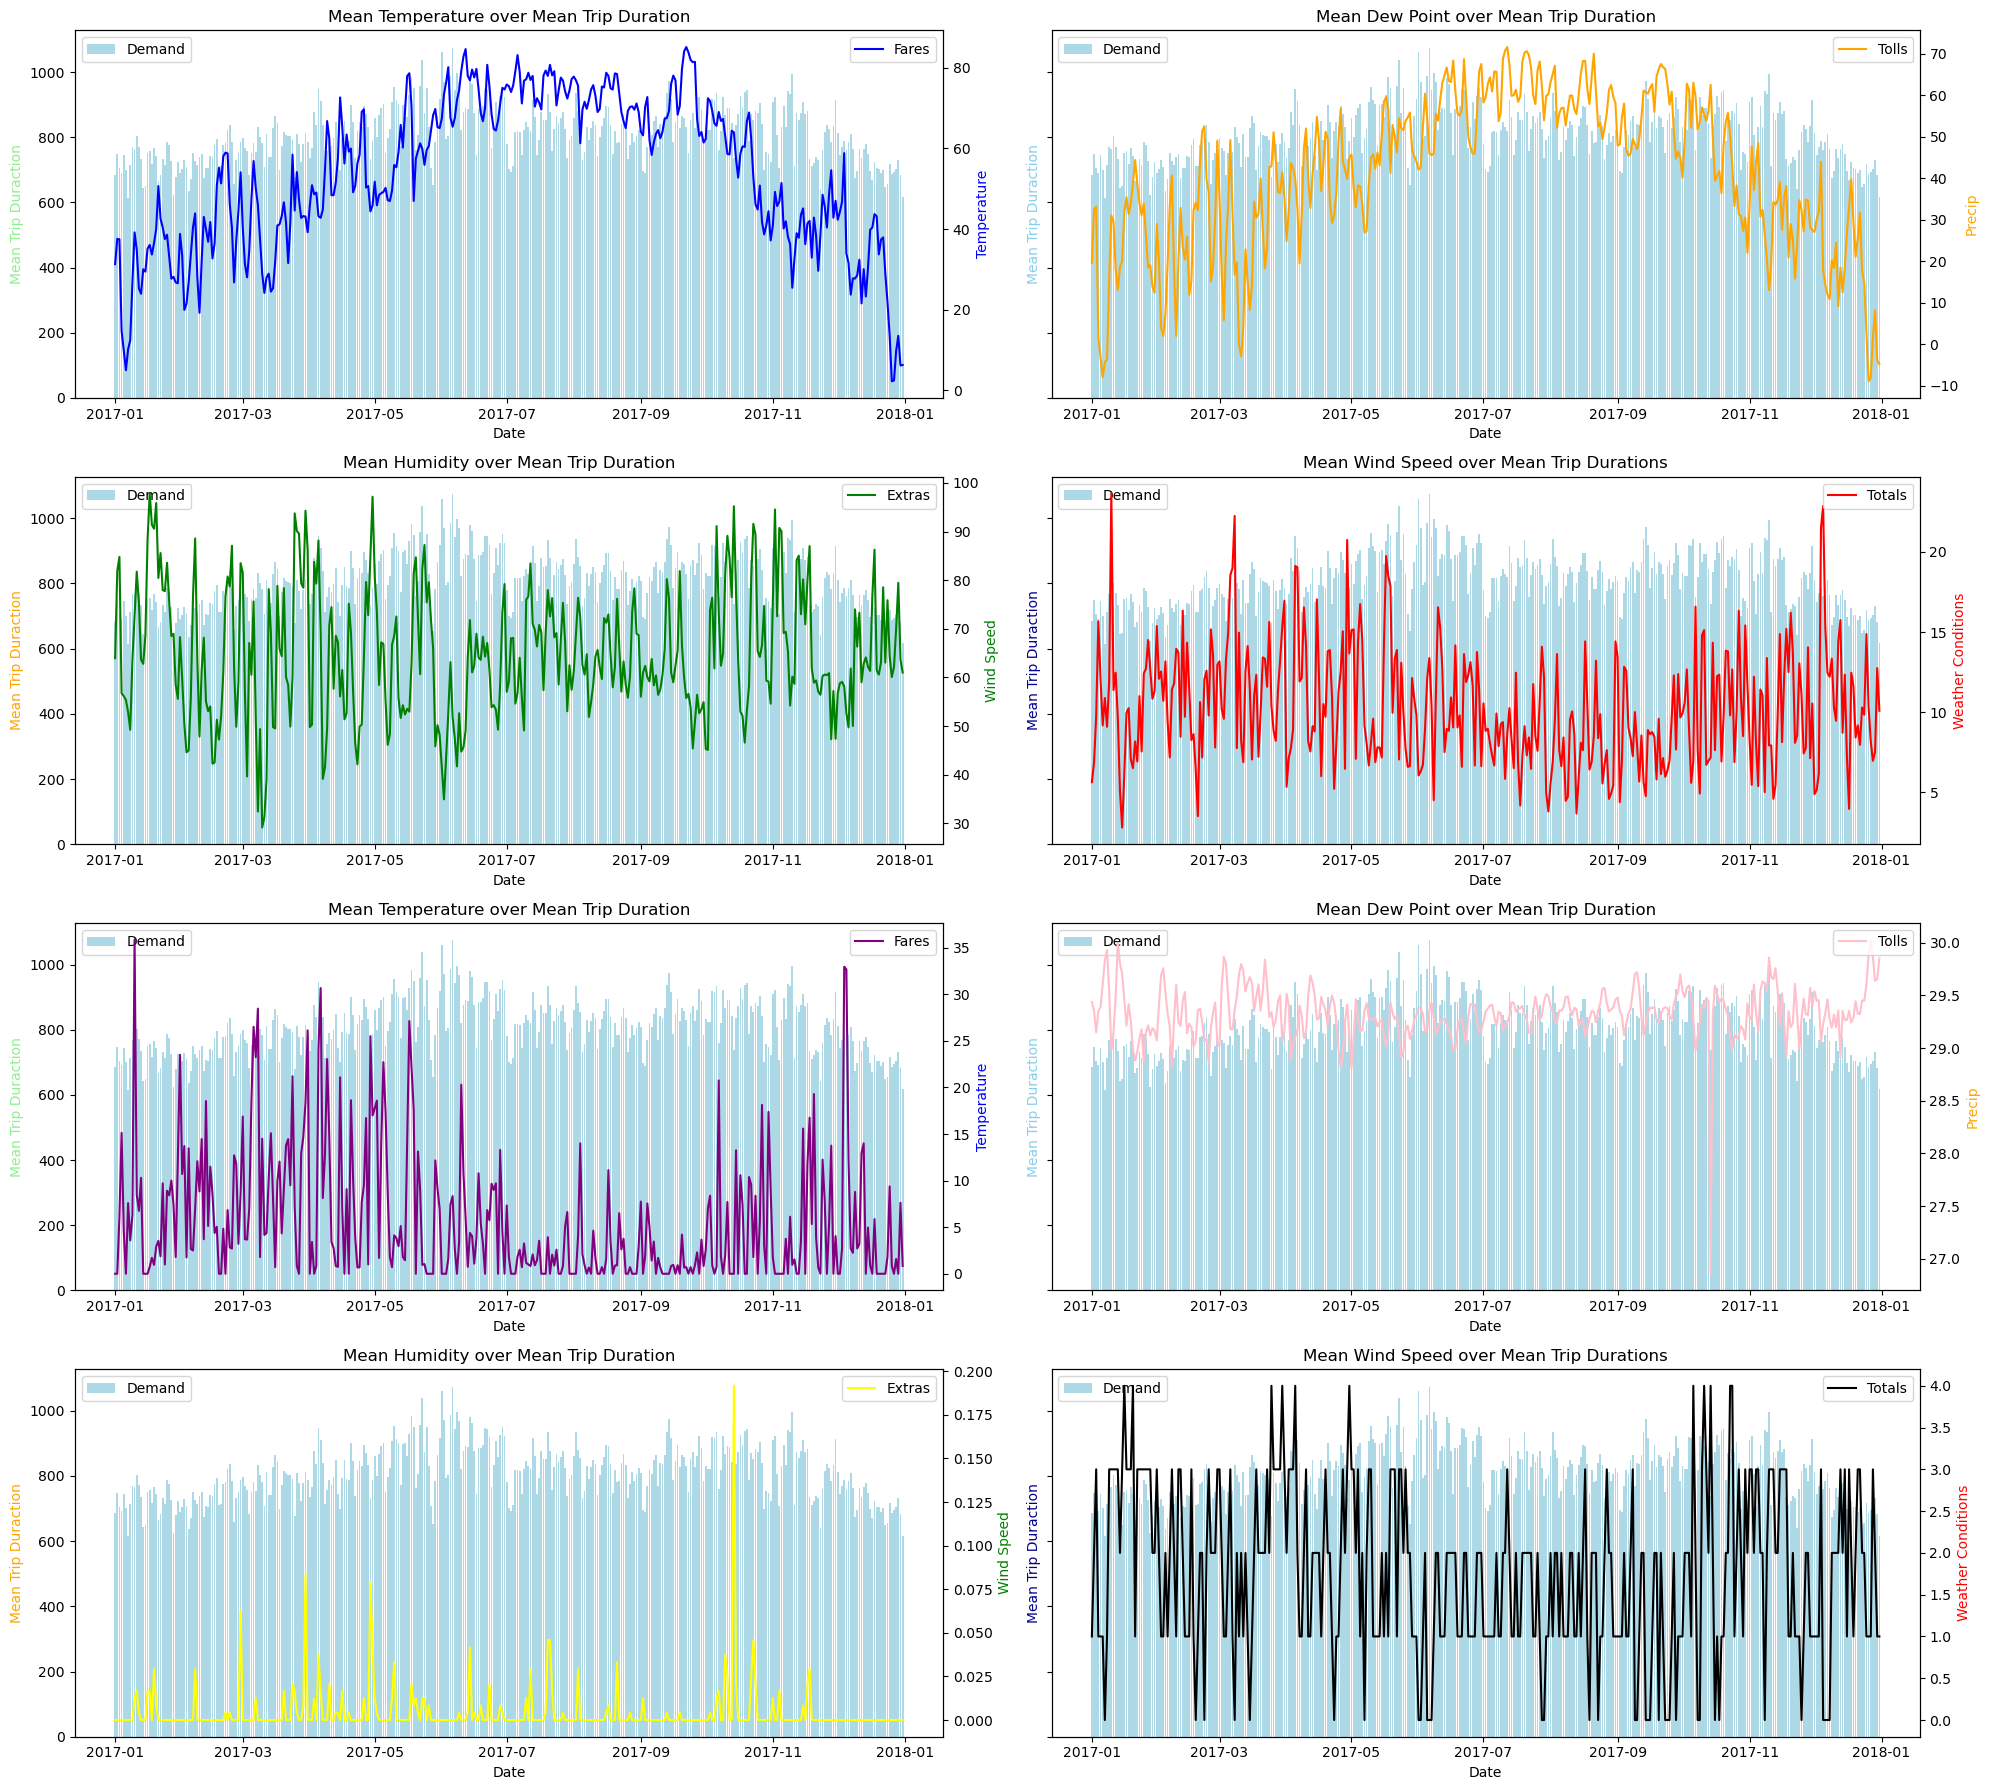

In [15]:
# Create one plot for every feature, which shows the development of the feature in comparison to durations development
fig, axs = plt.subplots(4, 2, figsize=(20, 18), sharey=True)

# Plot for Temperature
ax1 = axs[0, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['temp'], color='blue', label='Fares')
ax1.set_title('Mean Temperature over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='lightgreen')
ax2.set_ylabel('Temperature', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Dew Point
ax1 = axs[0, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['dew_point'], color='orange', label='Tolls')
ax1.set_title('Mean Dew Point over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='skyblue')
ax2.set_ylabel('Precip', color='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Humidity
ax1 = axs[1, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['humidity'], color='green', label='Extras')
ax1.set_title('Mean Humidity over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='orange')
ax2.set_ylabel('Wind Speed', color='green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Wind Speed
ax1 = axs[1, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['wind_speed'], color='red', label='Totals')
ax1.set_title('Mean Wind Speed over Mean Trip Durations')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='darkblue')
ax2.set_ylabel('Weather Conditions', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Wind Gust
ax1 = axs[2, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['wind_gust'], color='purple', label='Fares')
ax1.set_title('Mean Temperature over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='lightgreen')
ax2.set_ylabel('Temperature', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Pressure
ax1 = axs[2, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['pressure'], color='pink', label='Tolls')
ax1.set_title('Mean Dew Point over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='skyblue')
ax2.set_ylabel('Precip', color='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Precip
ax1 = axs[3, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['precip'], color='yellow', label='Extras')
ax1.set_title('Mean Humidity over Mean Trip Duration')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='orange')
ax2.set_ylabel('Wind Speed', color='green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Condition Map
ax1 = axs[3, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_year['trip_start_date'], duration_weather_year['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_year['trip_start_date'], duration_weather_year['condition_map'], color='black', label='Totals')
ax1.set_title('Mean Wind Speed over Mean Trip Durations')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Trip Duraction', color='darkblue')
ax2.set_ylabel('Weather Conditions', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

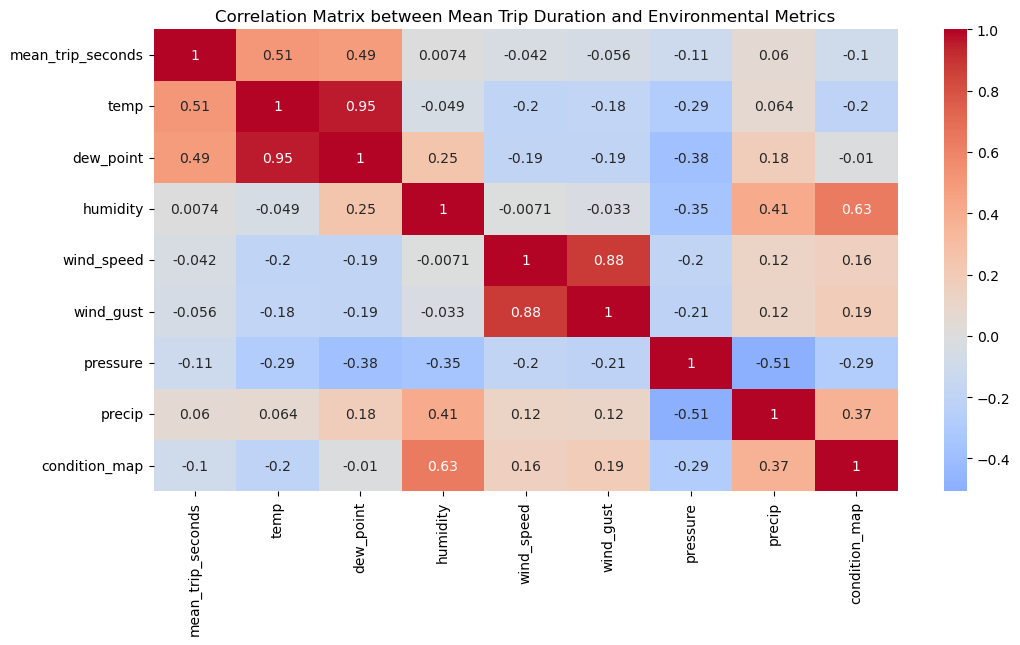

In [16]:
# Calculate the correlation of each feature with the mean trip duraiton
corr_matrix = duration_weather_year.corr()
#visualize correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Mean Trip Duration and Environmental Metrics')
plt.show()

Different to the demand, some environmental metrics seemed to follow the trip duration curve. This was backed by the correlation analysis, which showed medium correlations between trip duration and temperature and dew point.

## 4.1.2.3 Impact Weekends & Holidays

In [17]:
# Analyizing impact of Weekends and Holidays on average Trip Duration
avg_duration_year.head()

,trip_start_date,mean_trip_seconds
0,2017-01-01,685.512403
1,2017-01-02,748.521707
2,2017-01-03,705.300305
3,2017-01-04,691.319290
4,2017-01-05,745.031689


In [18]:
# Again using a isHoliday mapping and column to mark holidays
# Using a isWeekedn column to mark weekend-days

weekend_holiday_prep = avg_duration_year.copy()
weekend_holiday_prep['trip_start_date'] = pd.to_datetime(weekend_holiday_prep['trip_start_date'].dt.date)
holiday_strings = ["01.01.2017", "02.01.2017", "16.01.2017", "20.01.2017", "20.02.2017", "29.05.2017",
    "04.07.2017", "04.09.2017", "09.10.2017", "10.11.2017", "11.11.2017", "23.11.2017", "25.11.2017"]
date_format = "%d.%m.%Y"
holidays = [datetime.strptime(date, date_format) for date in holiday_strings]

def isHoliday(date):
    return date in holidays

weekend_holiday_prep['isHoliday'] = weekend_holiday_prep['trip_start_date'].apply(isHoliday)
weekend_holiday_prep['isWeekend'] = weekend_holiday_prep['trip_start_date'].dt.dayofweek >= 5

In [19]:
weekend_holiday_prep

,trip_start_date,mean_trip_seconds,isHoliday,isWeekend
0,2017-01-01,685.512403,True,True
1,2017-01-02,748.521707,True,False
2,2017-01-03,705.300305,False,False
3,2017-01-04,691.319290,False,False
4,2017-01-05,745.031689,False,False
...,...,...,...,...
360,2017-12-27,694.188280,False,False
361,2017-12-28,703.431110,False,False
362,2017-12-29,731.393030,False,False
363,2017-12-30,682.975006,False,True


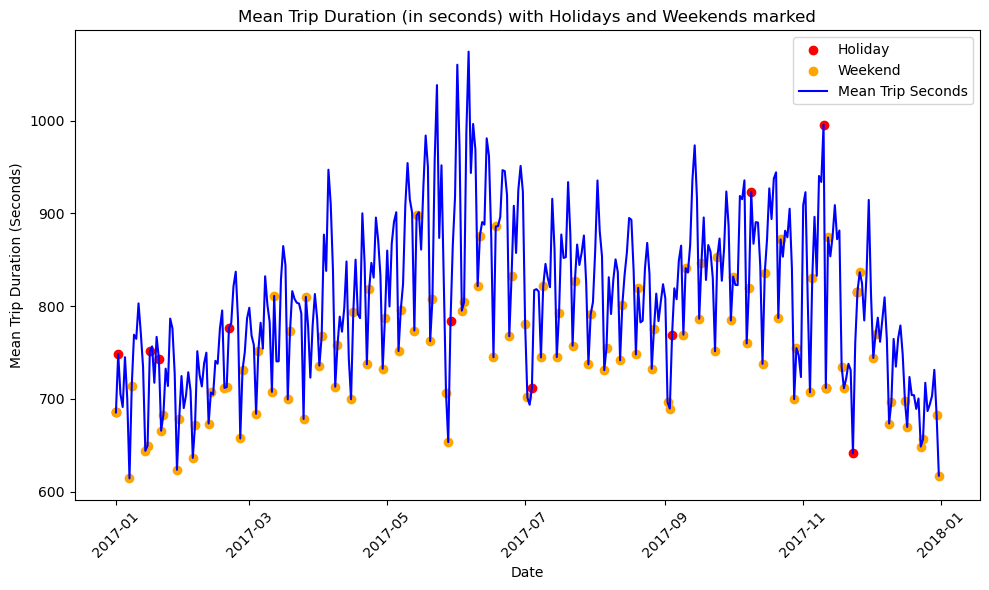

In [20]:
# Mark Holidays and Weekends on the Mean Trip Duration Curve
plt.figure(figsize=(10, 6))
plt.scatter(weekend_holiday_prep[weekend_holiday_prep['isHoliday']]['trip_start_date'], weekend_holiday_prep[weekend_holiday_prep['isHoliday']]['mean_trip_seconds'], color='r', label='Holiday')
plt.scatter(weekend_holiday_prep[weekend_holiday_prep['isWeekend']]['trip_start_date'], weekend_holiday_prep[weekend_holiday_prep['isWeekend']]['mean_trip_seconds'], color='orange', label='Weekend')
plt.plot(weekend_holiday_prep['trip_start_date'], weekend_holiday_prep['mean_trip_seconds'], linestyle='-', color='b', label='Mean Trip Seconds')
plt.xlabel('Date')
plt.ylabel('Mean Trip Duration (Seconds)')
plt.title('Mean Trip Duration (in seconds) with Holidays and Weekends marked')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

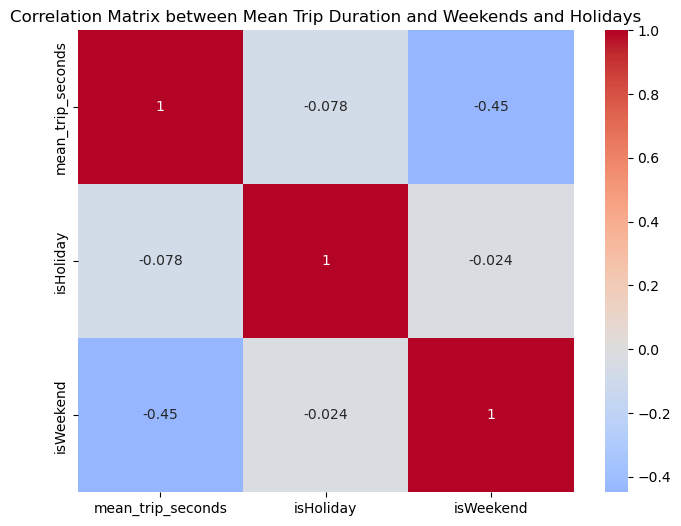

In [21]:
# Calculate correlation of weekends and holidays on mean trip duration
corr_matrix = weekend_holiday_prep.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Mean Trip Duration and Weekends and Holidays')
plt.show()

Analysis of weekends again indicated local trip duration minima on weekdays, but real connection between holidays and trip durations. A medium negative correlation between trip duration and weekends confirmed this.

## 4.1.2.4 Impact of Months and Seasons

In [22]:
avg_duration_year.head()

,trip_start_date,mean_trip_seconds
0,2017-01-01,685.512403
1,2017-01-02,748.521707
2,2017-01-03,705.300305
3,2017-01-04,691.319290
4,2017-01-05,745.031689


In [23]:
# Mapping seasons, season name and month names to month index
month_season_prep = avg_duration_year.copy()

month_season_prep['month'] = month_season_prep['trip_start_date'].dt.month
months_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_season_prep['month_name'] = month_season_prep['month'].map(months_map)

season_name_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
season_map = {1: 4, 2: 4, 3: 1, 4: 1, 5: 1,6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 4}
month_season_prep['season_name'] = month_season_prep['trip_start_date'].dt.month.map(season_name_map)
month_season_prep['season'] = month_season_prep['trip_start_date'].dt.month.map(season_map)

In [24]:
month_season_prep.head()

,trip_start_date,mean_trip_seconds,month,month_name,season_name,season
0,2017-01-01,685.512403,1,January,Winter,4
1,2017-01-02,748.521707,1,January,Winter,4
2,2017-01-03,705.300305,1,January,Winter,4
3,2017-01-04,691.319290,1,January,Winter,4
4,2017-01-05,745.031689,1,January,Winter,4


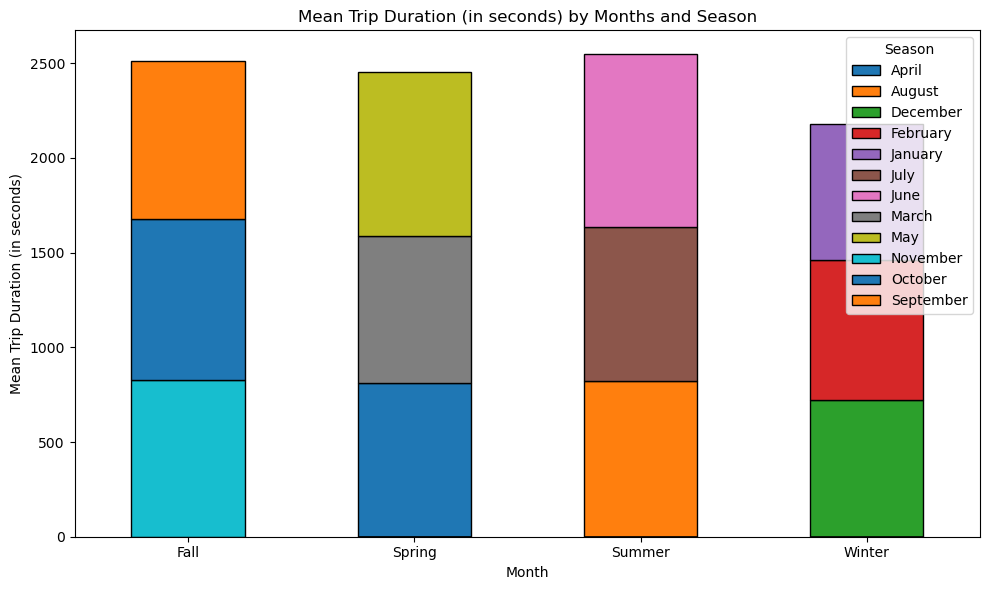

In [25]:
# Aggrgate mean trip duration over seasons and months to create stacked bar plot
grouped_months_season = month_season_prep.groupby(['season_name', 'month_name'])['mean_trip_seconds'].mean().unstack()

ax = grouped_months_season.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black')
ax.set_xlabel('Month')
ax.set_ylabel('Mean Trip Duration (in seconds)')
ax.set_title('Mean Trip Duration (in seconds) by Months and Season')
plt.xticks(rotation=0)
plt.legend(title='Season')

plt.tight_layout()
plt.show()

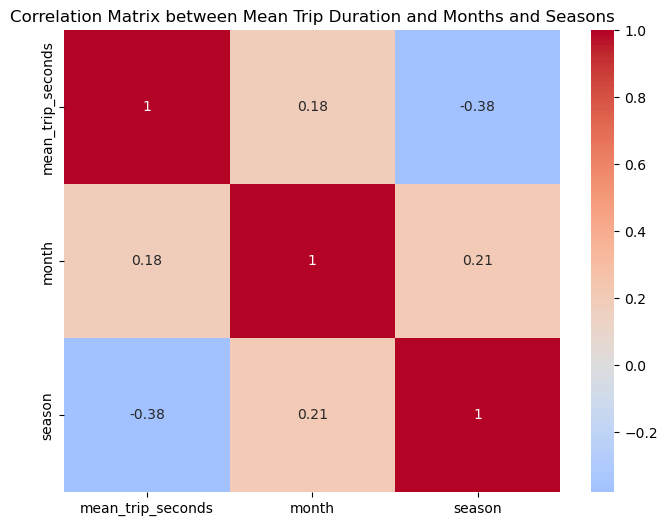

In [26]:

corr_matrix = month_season_prep.corr()
#visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Mean Trip Duration and Months and Seasons')
plt.show()

Seasons appeared to have a mild correlation with trip duration, while months did not seem to have a major impact on trip durations.

## 4.1.2.5 Impact of Weekdays

In [27]:
weekday_prep = avg_duration_year.copy()
weekday_prep['weekday'] = weekday_prep['trip_start_date'].dt.dayofweek

In [28]:
# Aggregate average trip duration based on weekdays
grouped_weekday = weekday_prep.groupby(['weekday'])['mean_trip_seconds'].mean().reset_index()

In [29]:
# Map weekday indices to names
weekday_names = {0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
grouped_weekday['weekday_name'] = grouped_weekday['weekday'].apply(lambda x: weekday_names[x])

In [30]:
grouped_weekday.head()

,weekday,mean_trip_seconds,weekday_name
0,0,815.794487,Monday
1,1,809.846416,Tuesday
2,2,841.480520,Wednesday
3,3,860.715131,Thursday
4,4,831.319855,Friday


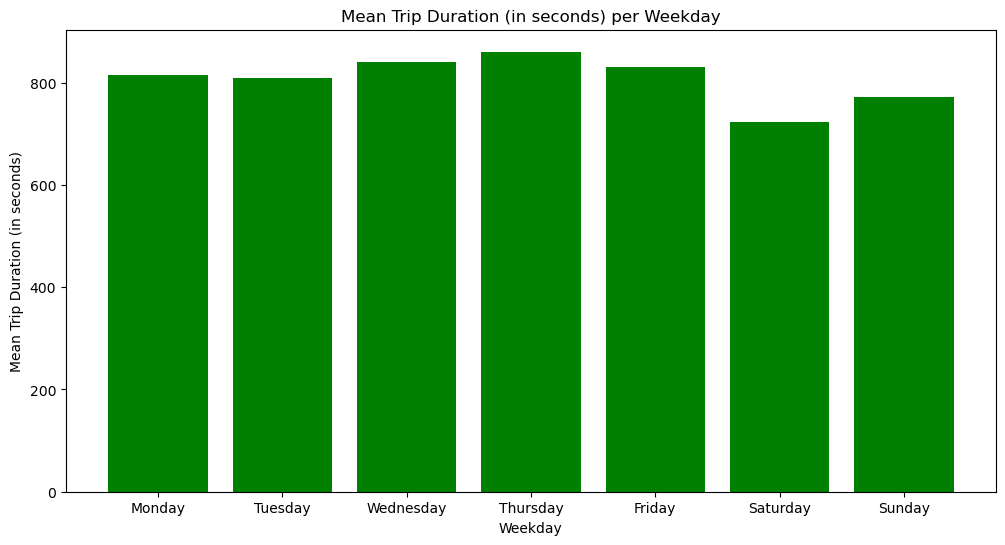

In [31]:
# Plot 
plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_weekday['weekday_name'], grouped_weekday['mean_trip_seconds'], color='green')
plt.xlabel('Weekday')
plt.ylabel('Mean Trip Duration (in seconds)')
plt.title('Mean Trip Duration (in seconds) per Weekday')
plt.show()

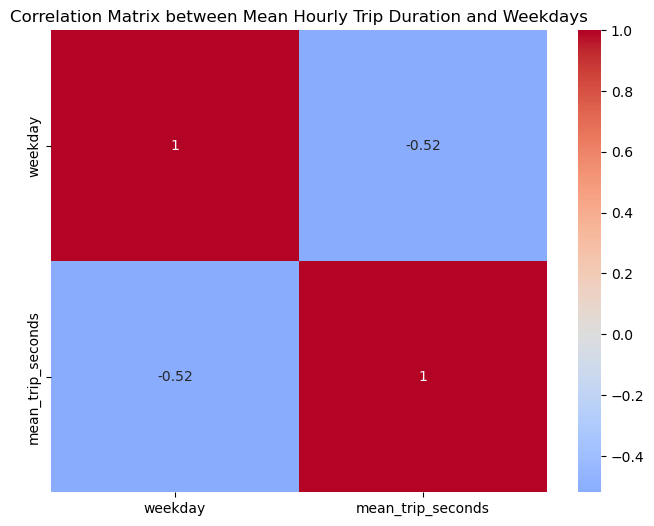

In [32]:
corr_matrix = grouped_weekday.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Mean Hourly Trip Duration and Weekdays')
plt.show()

An increase towards friday was detected, with the weekday feature showing a medium correlateion with the trip duration.

## 4.1.2.6 Average Hourly Trip Durations

In [33]:
trip_duration_hourly = df_trips.groupby(by='trip_start_hour').agg({'mean_trip_seconds': vaex.agg.mean('trip_seconds')}) 

In [34]:
trip_duration_hourly = trip_duration_hourly.sort('trip_start_hour')
trip_duration_hourly = trip_duration_hourly.to_pandas_df()
trip_duration_hourly['time'] = pd.to_datetime(weather_prep['time'], format='%H:%M').dt.strftime('%H:00')
trip_duration_hourly.drop('trip_start_hour', axis=1, inplace=True)
trip_duration_hourly.head()

,mean_trip_seconds,time
0,632.751584,00:00
1,585.249379,01:00
2,559.116552,02:00
3,579.877383,03:00
4,682.306380,04:00


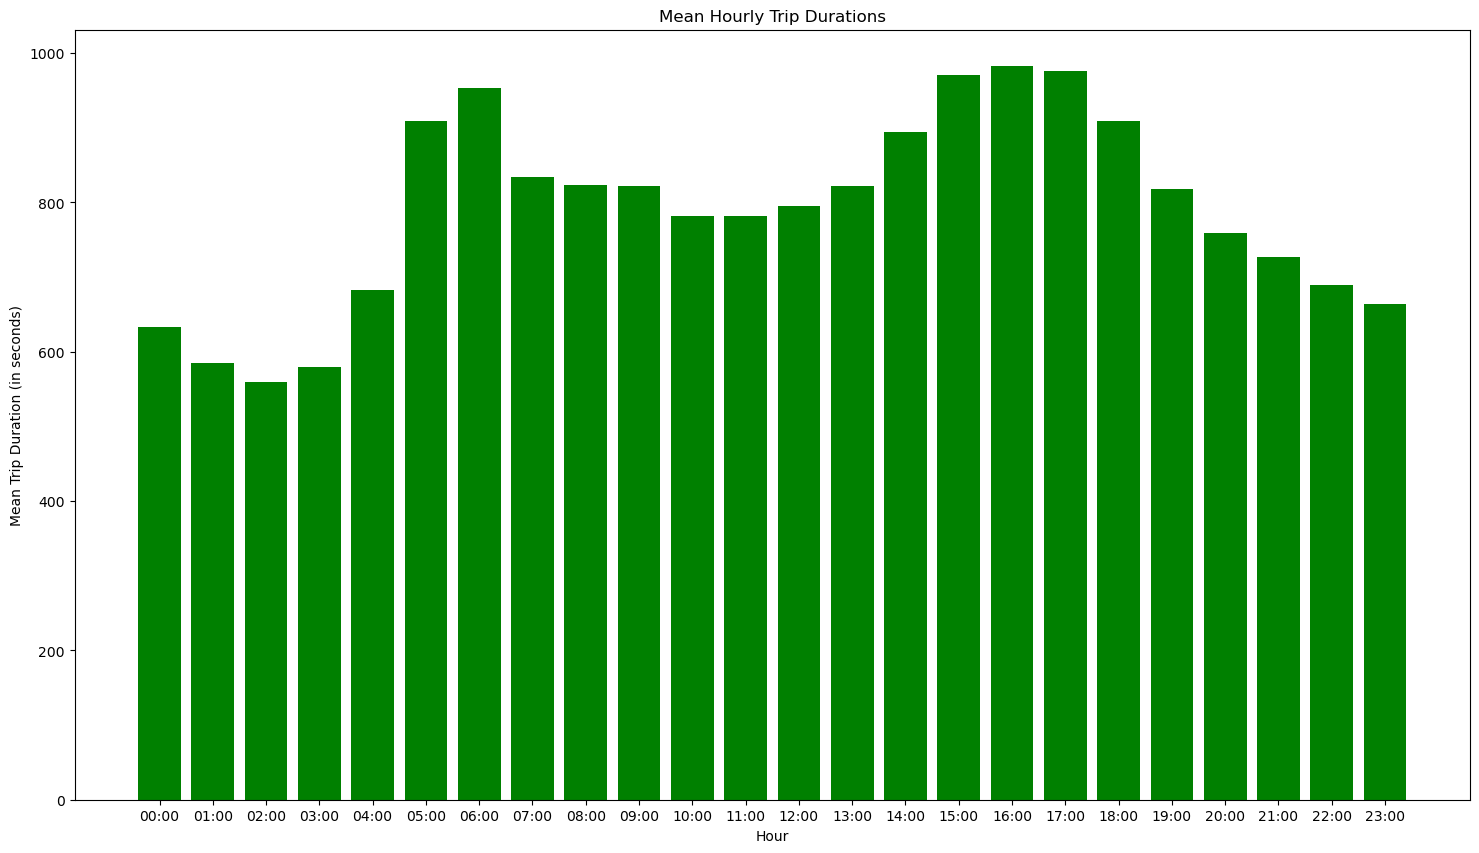

In [35]:
# Plotting mean hourly trip durations
plt.figure(figsize=(18, 10))
bars = plt.bar(trip_duration_hourly['time'], trip_duration_hourly['mean_trip_seconds'], color='green')
plt.xlabel('Hour')
plt.ylabel('Mean Trip Duration (in seconds)')
plt.title('Mean Hourly Trip Durations')
plt.show()

## 4.1.2.7 Impact of Environmental Metrics

In [36]:
# converting time column from HH:53 format to HH:00 format to ensure uniform timeformat with trip duration dataframe
weather_prep['time'] = pd.to_datetime(weather_prep['time'], format='%H:%M').dt.strftime('%H:00')
# merge average trip times by hour with weather coniditions per hour
duration_weather_hour = pd.merge(trip_duration_hourly, weather_prep, on='time', how='outer')
#d rop not useful columns
duration_weather_hour.drop(['date_time','trip_start_date','date'], axis=1,inplace=True)
# Calculate means of all columns based on time
duration_weather_hour =  duration_weather_hour.groupby(['time'])[list_features].mean().reset_index()

In [37]:
duration_weather_hour.head()

,time,mean_trip_seconds,temp,dew_point,humidity,wind_speed,wind_gust,pressure,precip,condition_map
0,00:00,632.751584,50.997260,40.736986,69.260274,8.997260,3.750685,29.337123,0.005205,1.746951
1,01:00,585.249379,50.501370,40.890411,70.808219,8.756164,3.446575,29.330493,0.002466,1.715596
2,02:00,559.116552,49.868493,40.802740,72.120548,8.391781,2.931507,29.330411,0.004658,1.660494
3,03:00,579.877383,49.323288,40.758904,73.424658,8.331507,3.400000,29.328849,0.006027,1.648148
4,04:00,682.306380,48.791781,40.808219,74.843836,8.367123,2.934247,29.330438,0.003288,1.673981


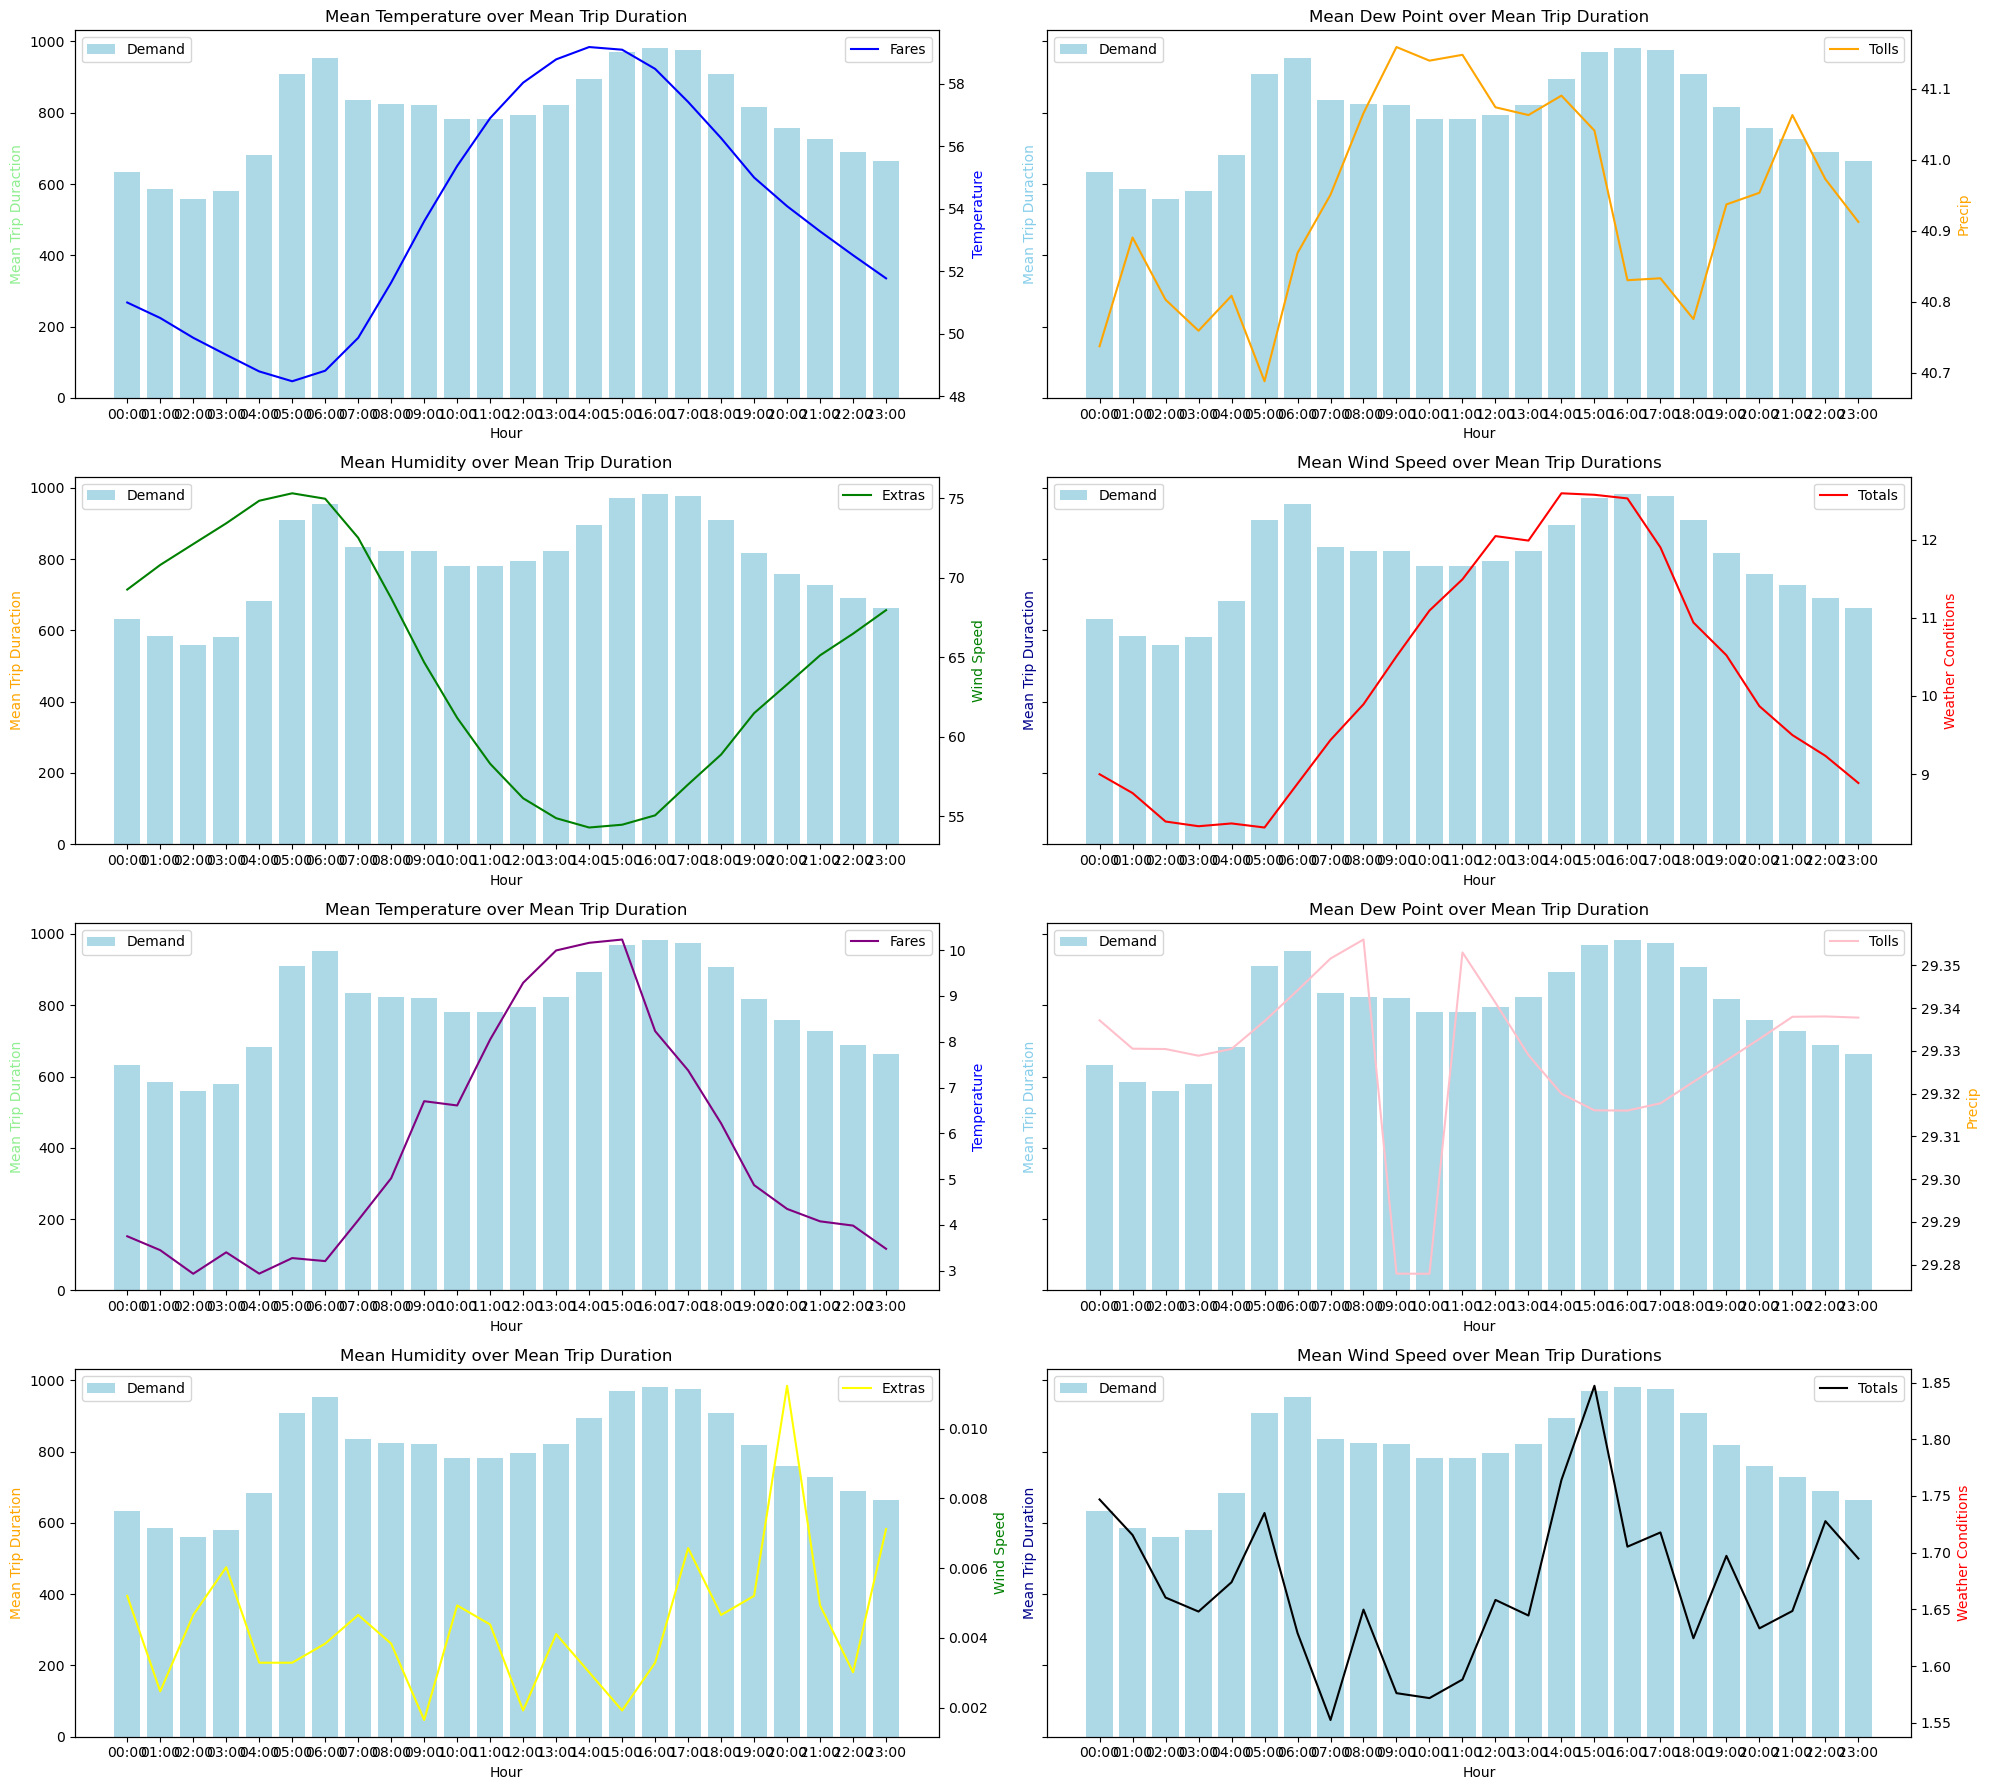

In [38]:
# Again creating plot showing the development of all environmental features with respect to mean hourly trip duration
fig, axs = plt.subplots(4, 2, figsize=(20, 18), sharey=True)

# Plot for Temperature
ax1 = axs[0, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_hour['time'], duration_weather_hour['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_hour['time'], duration_weather_hour['temp'], color='blue', label='Fares')
ax1.set_title('Mean Temperature over Mean Trip Duration')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean Trip Duraction', color='lightgreen')
ax2.set_ylabel('Temperature', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Dew Point
ax1 = axs[0, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_hour['time'], duration_weather_hour['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_hour['time'], duration_weather_hour['dew_point'], color='orange', label='Tolls')
ax1.set_title('Mean Dew Point over Mean Trip Duration')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean Trip Duraction', color='skyblue')
ax2.set_ylabel('Precip', color='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Humidity
ax1 = axs[1, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_hour['time'], duration_weather_hour['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_hour['time'], duration_weather_hour['humidity'], color='green', label='Extras')
ax1.set_title('Mean Humidity over Mean Trip Duration')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean Trip Duraction', color='orange')
ax2.set_ylabel('Wind Speed', color='green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Wind Speed
ax1 = axs[1, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_hour['time'], duration_weather_hour['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_hour['time'], duration_weather_hour['wind_speed'], color='red', label='Totals')
ax1.set_title('Mean Wind Speed over Mean Trip Durations')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean Trip Duraction', color='darkblue')
ax2.set_ylabel('Weather Conditions', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Wind Gust
ax1 = axs[2, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_hour['time'], duration_weather_hour['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_hour['time'], duration_weather_hour['wind_gust'], color='purple', label='Fares')
ax1.set_title('Mean Temperature over Mean Trip Duration')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean Trip Duration', color='lightgreen')
ax2.set_ylabel('Temperature', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Pressure
ax1 = axs[2, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_hour['time'], duration_weather_hour['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_hour['time'], duration_weather_hour['pressure'], color='pink', label='Tolls')
ax1.set_title('Mean Dew Point over Mean Trip Duration')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean Trip Duration', color='skyblue')
ax2.set_ylabel('Precip', color='orange')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Precip
ax1 = axs[3, 0]
ax2 = ax1.twinx()
ax1.bar(duration_weather_hour['time'], duration_weather_hour['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_hour['time'], duration_weather_hour['precip'], color='yellow', label='Extras')
ax1.set_title('Mean Humidity over Mean Trip Duration')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean Trip Duration', color='orange')
ax2.set_ylabel('Wind Speed', color='green')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot for Condition Map
ax1 = axs[3, 1]
ax2 = ax1.twinx()
ax1.bar(duration_weather_hour['time'], duration_weather_hour['mean_trip_seconds'], color='lightblue', label='Demand')
ax2.plot(duration_weather_hour['time'], duration_weather_hour['condition_map'], color='black', label='Totals')
ax1.set_title('Mean Wind Speed over Mean Trip Durations')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Mean Trip Duration', color='darkblue')
ax2.set_ylabel('Weather Conditions', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

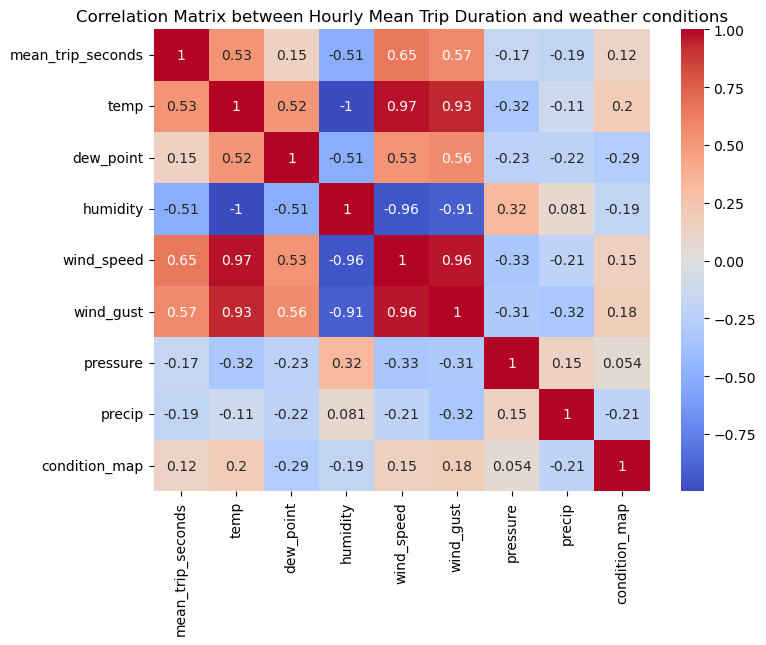

In [39]:
# calculating correlations of all features
corr_matrix = duration_weather_hour.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Hourly Mean Trip Duration and weather conditions')
plt.show()

Some environemtnal seemed to follow the duration curve. The correlation matrix confirmed temperature, humidity, wind speed and wind gust to be correlated with the trip duration.

## 4.1.2.8 Impact of Weekends & Holidays

In [40]:
trip_duration_weekend = df_trips.groupby(by=['trip_start_date','trip_start_hour']).agg({'mean_trip_seconds': vaex.agg.mean('trip_seconds')}) 

In [41]:
# Creating features weekends and holidays
trip_duration_weekend = trip_duration_weekend.to_pandas_df()
trip_duration_weekend = trip_duration_weekend.sort_values(by=['trip_start_date','trip_start_hour'])
weather_prep['time'] = pd.to_datetime(trip_duration_weekend['trip_start_hour'], format='%H').dt.strftime('%H:00')
trip_duration_weekend['isWeekend'] = trip_duration_weekend['trip_start_date'].dt.dayofweek >=5
trip_duration_weekend['isHoliday'] = trip_duration_weekend['trip_start_date'].apply(isHoliday)

In [42]:
trip_duration_weekend.head()

,trip_start_date,trip_start_hour,mean_trip_seconds,isWeekend,isHoliday
5735,2017-01-01,0,774.932412,True,True
5736,2017-01-01,1,751.039813,True,True
5737,2017-01-01,2,738.792081,True,True
5738,2017-01-01,3,623.011079,True,True
5739,2017-01-01,4,597.766372,True,True


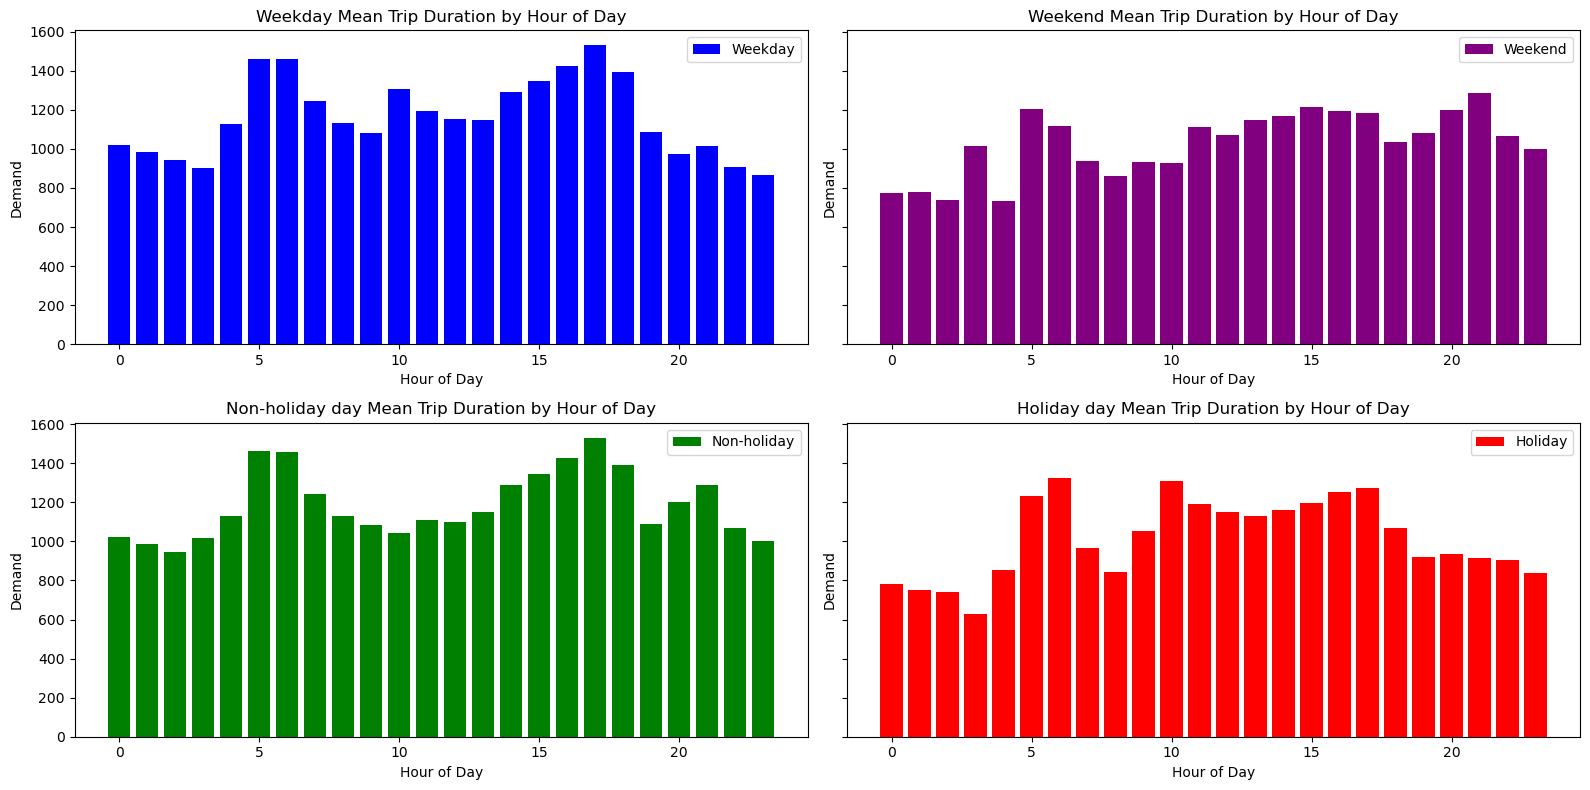

In [43]:
# Plotting hourly trip duration of weekdays and weekends
weekday_data = trip_duration_weekend[trip_duration_weekend['isWeekend'] == False]
weekend_data = trip_duration_weekend[trip_duration_weekend['isWeekend'] == True]

holiday_data = trip_duration_weekend[trip_duration_weekend['isHoliday'] == True]
non_holiday_data = trip_duration_weekend[trip_duration_weekend['isHoliday'] == False]

fig, axs = plt.subplots(2,2, figsize=(16, 8), sharey=True)
axs[0,0].bar(weekday_data['trip_start_hour'], weekday_data['mean_trip_seconds'], color='b', label='Weekday')
axs[0,0].set_title('Weekday Mean Trip Duration by Hour of Day')
axs[0,0].set_xlabel('Hour of Day')
axs[0,0].set_ylabel('Demand')
axs[0,0].legend()

axs[0,1].bar(weekend_data['trip_start_hour'], weekend_data['mean_trip_seconds'], color='purple', label='Weekend')
axs[0,1].set_title('Weekend Mean Trip Duration by Hour of Day')
axs[0,1].set_xlabel('Hour of Day')
axs[0,1].set_ylabel('Demand')
axs[0,1].legend()

axs[1,0].bar(non_holiday_data['trip_start_hour'], non_holiday_data['mean_trip_seconds'], color='green', label='Non-holiday')
axs[1,0].set_title('Non-holiday day Mean Trip Duration by Hour of Day')
axs[1,0].set_xlabel('Hour of Day')
axs[1,0].set_ylabel('Demand')
axs[1,0].legend()

axs[1,1].bar(holiday_data['trip_start_hour'], holiday_data['mean_trip_seconds'], color='red', label='Holiday')
axs[1,1].set_title('Holiday day Mean Trip Duration by Hour of Day')
axs[1,1].set_xlabel('Hour of Day')
axs[1,1].set_ylabel('Demand')
axs[1,1].legend()

plt.tight_layout()
plt.show()

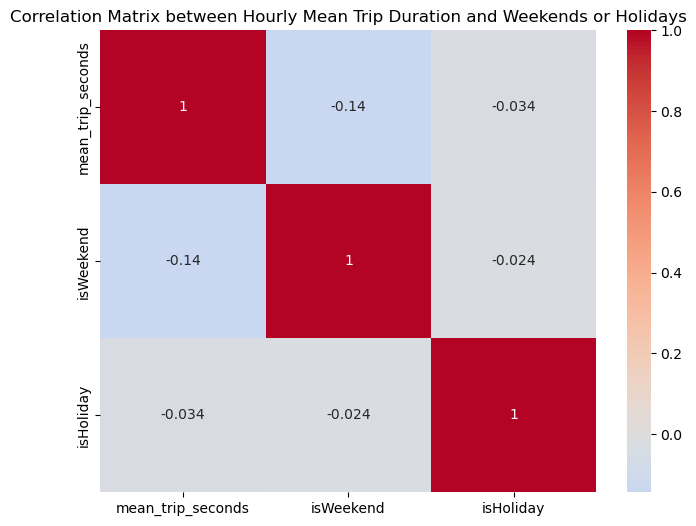

In [44]:
corr_matrix = trip_duration_weekend.drop('trip_start_hour',axis=1).corr()
#visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Hourly Mean Trip Duration and Weekends or Holidays')
plt.show()

While holidays and weekends did not seem to have a correlation with trip duration, they did show different duration patterns.

## 4.1.2.9 Impact of Seasons

In [45]:
trip_duration_season = df_trips.groupby(by=['trip_start_date','trip_start_hour']).agg({'mean_trip_seconds': vaex.agg.mean('trip_seconds')})
trip_duration_season['season'] = trip_duration_season['trip_start_date'].dt.month.map(season_map)
trip_duration_season = trip_duration_season.groupby(by=['trip_start_hour','season']).agg({'mean_trip_seconds': vaex.agg.mean('mean_trip_seconds')}) 
season_name_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
trip_duration_season['season_name'] = trip_duration_season['season'].copy().map(season_name_map)
trip_duration_season = trip_duration_season.to_pandas_df()

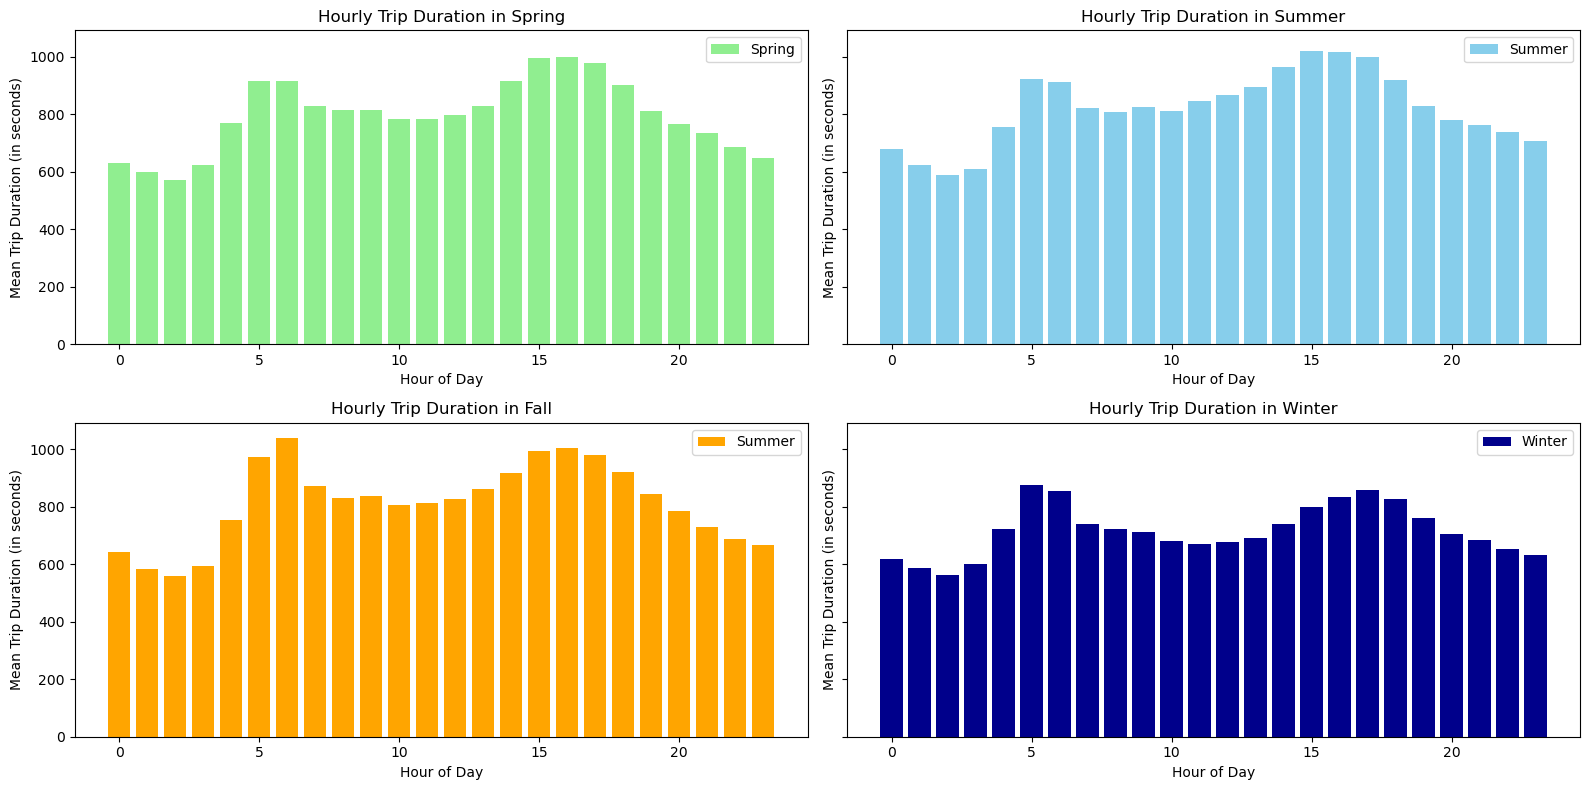

In [46]:
spring_data = trip_duration_season[trip_duration_season['season_name'] == 'Spring']
summer_data = trip_duration_season[trip_duration_season['season_name'] == 'Summer']
fall_data = trip_duration_season[trip_duration_season['season_name'] == 'Fall']
winter_data = trip_duration_season[trip_duration_season['season_name'] == 'Winter']

fig, axs = plt.subplots(2,2, figsize=(16, 8), sharey=True)
axs[0, 0].bar(spring_data['trip_start_hour'], spring_data['mean_trip_seconds'], color='lightgreen', label='Spring')
axs[0, 0].set_title('Hourly Trip Duration in Spring')
axs[0, 0].set_xlabel('Hour of Day')
axs[0, 0].set_ylabel('Mean Trip Duration (in seconds)')
axs[0, 0].legend()

axs[0, 1].bar(summer_data['trip_start_hour'], summer_data['mean_trip_seconds'], color='skyblue', label='Summer')
axs[0, 1].set_title('Hourly Trip Duration in Summer')
axs[0, 1].set_xlabel('Hour of Day')
axs[0, 1].set_ylabel('Mean Trip Duration (in seconds)')
axs[0, 1].legend()

axs[1, 0].bar(fall_data['trip_start_hour'], fall_data['mean_trip_seconds'], color='orange', label='Summer')
axs[1, 0].set_title('Hourly Trip Duration in Fall')
axs[1, 0].set_xlabel('Hour of Day')
axs[1, 0].set_ylabel('Mean Trip Duration (in seconds)')
axs[1, 0].legend()

axs[1, 1].bar(winter_data['trip_start_hour'], winter_data['mean_trip_seconds'], color='darkblue', label='Winter')
axs[1, 1].set_title('Hourly Trip Duration in Winter')
axs[1, 1].set_xlabel('Hour of Day')
axs[1, 1].set_ylabel('Mean Trip Duration (in seconds)')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

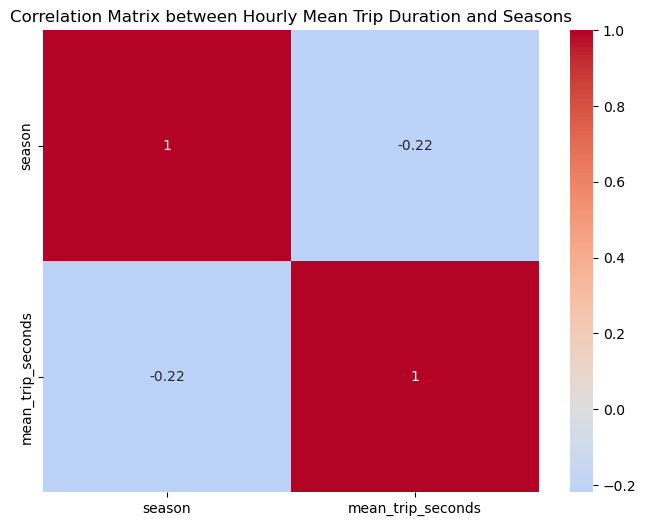

In [47]:
corr_matrix = trip_duration_season.drop(['trip_start_hour'], axis=1).corr()
#visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Hourly Mean Trip Duration and Seasons')
plt.show()

Seasons again showed and downwards trend towards winter, with the trip duration pattern remaining roughly the same.

## 4.1.2.10 Impact of Weekdays

In [48]:
trip_duration_weekend.head()

,trip_start_date,trip_start_hour,mean_trip_seconds,isWeekend,isHoliday
5735,2017-01-01,0,774.932412,True,True
5736,2017-01-01,1,751.039813,True,True
5737,2017-01-01,2,738.792081,True,True
5738,2017-01-01,3,623.011079,True,True
5739,2017-01-01,4,597.766372,True,True


In [49]:
trip_duration_weekday = trip_duration_weekend.copy()
trip_duration_weekday.drop(['isWeekend','isHoliday'], axis = 1, inplace = True)
trip_duration_weekday['weekday'] = trip_duration_weekday['trip_start_date'].dt.dayofweek
trip_duration_weekday = trip_duration_weekday.groupby(['weekday','trip_start_hour'])['mean_trip_seconds'].mean().reset_index()
#weekday-name mapping list is resused from earlier
trip_duration_weekday['weekday_name'] = trip_duration_weekday['weekday'].apply(lambda x: weekday_names[x])
trip_duration_weekday.head()

,weekday,trip_start_hour,mean_trip_seconds,weekday_name
0,0,0,692.111639,Monday
1,0,1,628.119046,Monday
2,0,2,580.316264,Monday
3,0,3,612.667256,Monday
4,0,4,819.562298,Monday


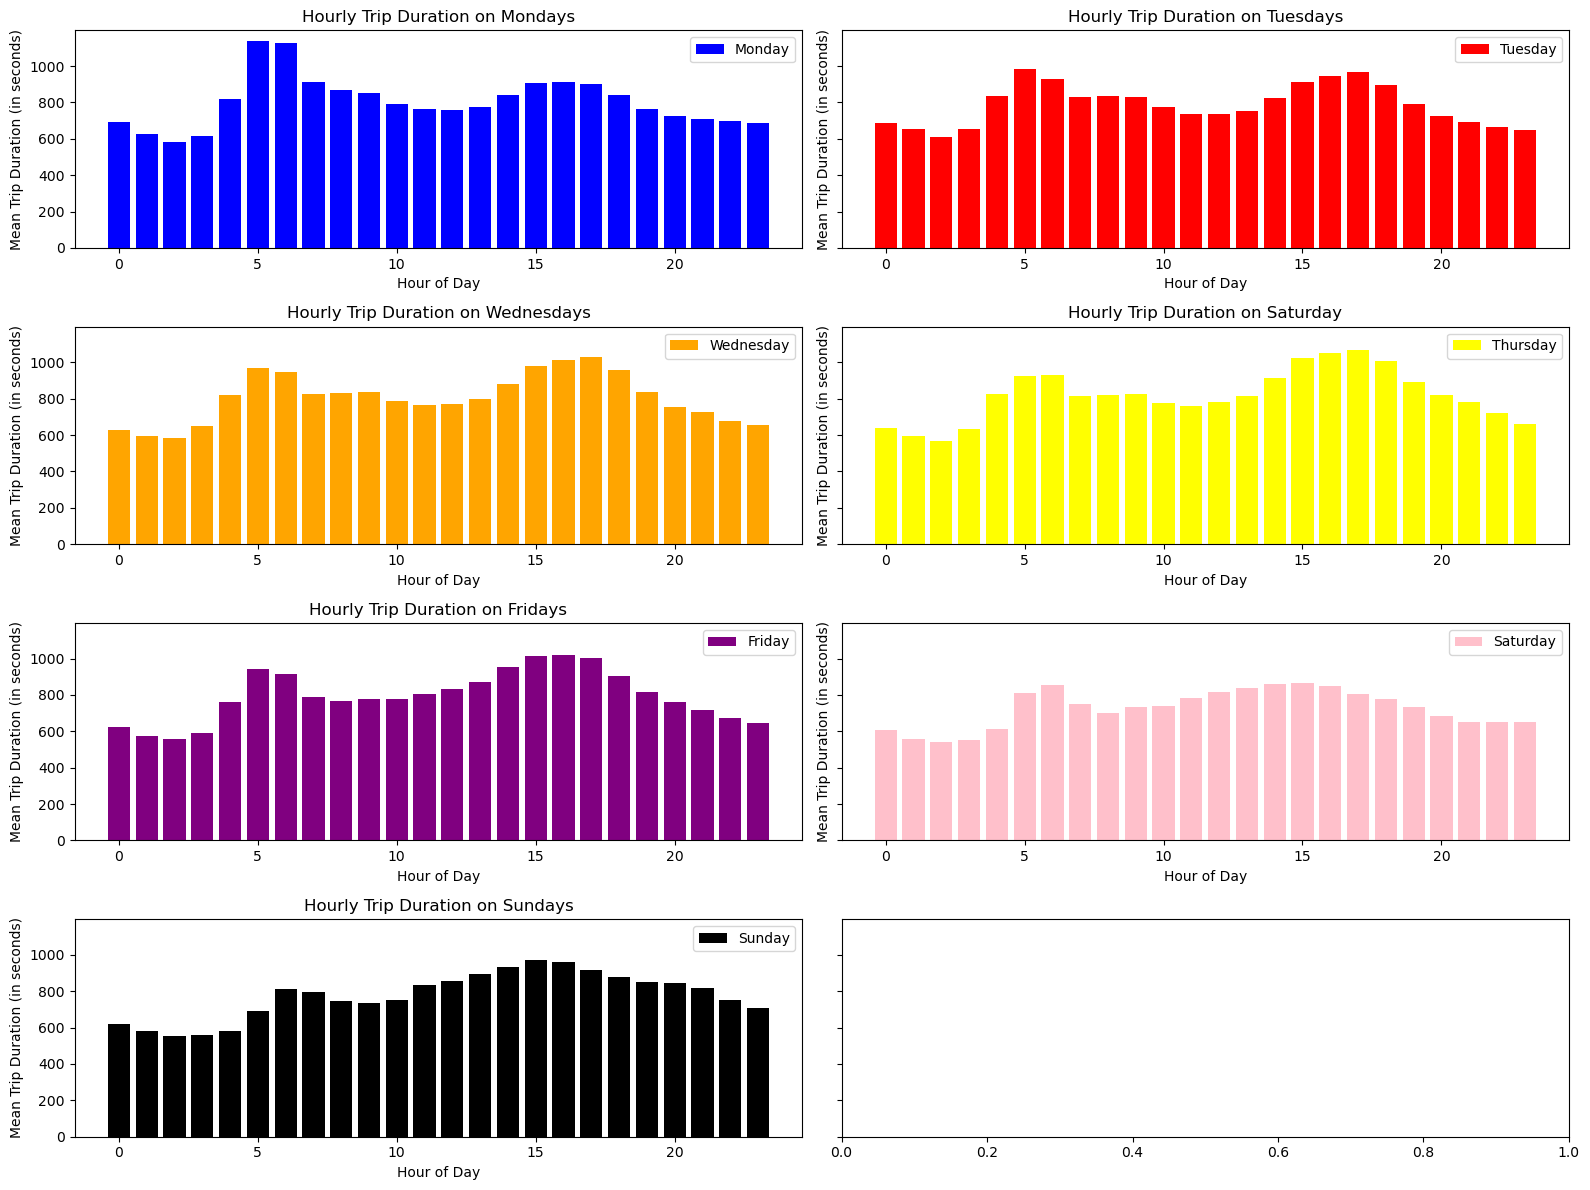

In [50]:
# Again creating plot showing the development of all environmental features with respect to mean hourly trip duration

monday_data = trip_duration_weekday[trip_duration_weekday['weekday_name'] == 'Monday']
tuesday_data = trip_duration_weekday[trip_duration_weekday['weekday_name'] == 'Tuesday']
wednesday_data = trip_duration_weekday[trip_duration_weekday['weekday_name'] == 'Wednesday']
thursday_data = trip_duration_weekday[trip_duration_weekday['weekday_name'] == 'Thursday']
friday_data = trip_duration_weekday[trip_duration_weekday['weekday_name'] == 'Friday']
saturday_data = trip_duration_weekday[trip_duration_weekday['weekday_name'] == 'Saturday']
sunday_data = trip_duration_weekday[trip_duration_weekday['weekday_name'] == 'Sunday']

fig, axs = plt.subplots(4,2, figsize=(16, 12), sharey=True)
axs[0, 0].bar(monday_data['trip_start_hour'], monday_data['mean_trip_seconds'], color='blue', label='Monday')
axs[0, 0].set_title('Hourly Trip Duration on Mondays')
axs[0, 0].set_xlabel('Hour of Day')
axs[0, 0].set_ylabel('Mean Trip Duration (in seconds)')
axs[0, 0].legend()

axs[0, 1].bar(tuesday_data['trip_start_hour'], tuesday_data['mean_trip_seconds'], color='red', label='Tuesday')
axs[0, 1].set_title('Hourly Trip Duration on Tuesdays')
axs[0, 1].set_xlabel('Hour of Day')
axs[0, 1].set_ylabel('Mean Trip Duration (in seconds)')
axs[0, 1].legend()

axs[1, 0].bar(wednesday_data['trip_start_hour'], wednesday_data['mean_trip_seconds'], color='orange', label='Wednesday')
axs[1, 0].set_title('Hourly Trip Duration on Wednesdays')
axs[1, 0].set_xlabel('Hour of Day')
axs[1, 0].set_ylabel('Mean Trip Duration (in seconds)')
axs[1, 0].legend()

axs[1, 1].bar(thursday_data['trip_start_hour'], thursday_data['mean_trip_seconds'], color='yellow', label='Thursday')
axs[1, 1].set_title('Hourly Trip Duration on Thursdays')
axs[1, 1].set_xlabel('Hour of Day')
axs[1, 1].set_ylabel('Mean Trip Duration (in seconds)')
axs[1, 1].legend()

axs[2, 0].bar(friday_data['trip_start_hour'], friday_data['mean_trip_seconds'], color='purple', label='Friday')
axs[2, 0].set_title('Hourly Trip Duration on Fridays')
axs[2, 0].set_xlabel('Hour of Day')
axs[2, 0].set_ylabel('Mean Trip Duration (in seconds)')
axs[2, 0].legend()

axs[2, 1].bar(saturday_data['trip_start_hour'], saturday_data['mean_trip_seconds'], color='pink', label='Saturday')
axs[1, 1].set_title('Hourly Trip Duration on Saturday')
axs[2, 1].set_xlabel('Hour of Day')
axs[2, 1].set_ylabel('Mean Trip Duration (in seconds)')
axs[2, 1].legend()

axs[3, 0].bar(sunday_data['trip_start_hour'], sunday_data['mean_trip_seconds'], color='black', label='Sunday')
axs[3, 0].set_title('Hourly Trip Duration on Sundays')
axs[3, 0].set_xlabel('Hour of Day')
axs[3, 0].set_ylabel('Mean Trip Duration (in seconds)')
axs[3, 0].legend()

plt.tight_layout()
plt.show()

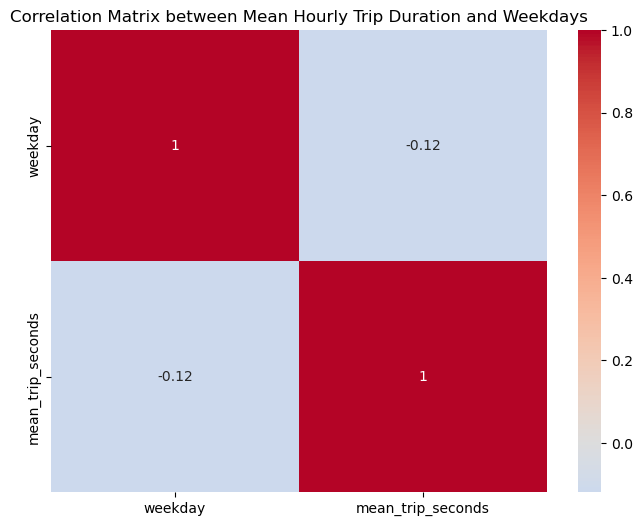

In [51]:
corr_matrix = trip_duration_weekday.drop(['trip_start_hour'], axis=1).corr()
#visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Mean Hourly Trip Duration and Weekdays')
plt.show()

While the correlation between weekdays and trip duration was rather low, they did display individual duration patterns.